# Predict if a customer will leave the country !

using the [chrurn dataset](https://www.kaggle.com/filemide/churns#churn_train.csv) investigate the features and there affect on the customer.

then build a logistic regression classifier to predict if a given customer will churn or not !

![churn](../res/chrun.jpeg)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [300]:
df = pd.read_csv("../datasets/churns/TRAIN.csv")

In [301]:
df.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0


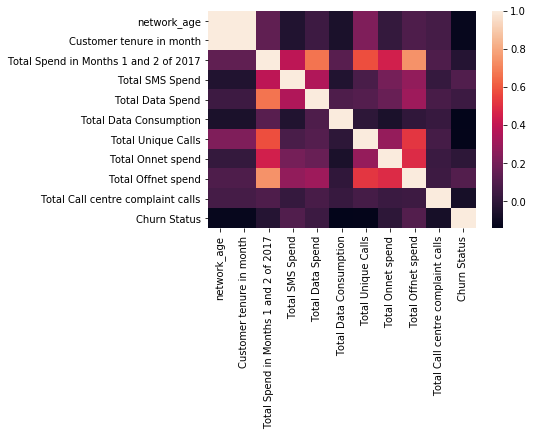

In [302]:
corr = df.corr()
sb.heatmap(corr)

In [323]:
features = df.iloc[:,[3,4,5,8,9]].values
goal = df.iloc[:,-1].values

In [324]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)

In [325]:
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [326]:
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

,0,1
0,81,45
1,29,125


In [327]:
logistic.score(test_set, goal_test)

0.73571428571428577